# CC1 Chaîne de masse-ressort

## Description du problème

On considère une chaîne de $N+2$ masses $m$ numérotées de $0$ à $N+1$ et reliées entre elles par des ressorts de raideur $k$. Les masses $0$ et $N+1$ sont maintenues fixes et on applique une force $F \cos(\omega t)$, qui varie sinusoidalement en fonction du temps $t$, sur la masse $N$.

Après un régime transitoire, le déplacement de la masse $n$ par rapport à sa position d'équilibre est: $A_n \cos(\omega t)$ où $A_n$ est un réel positif ou négatif. Ainsi, les déplacements des masses sont synchronisées, mais chaque déplacement a une amplitude $A_n$ différente. Ce deplacement peut même s'inverser (en opposition de phase) lorsque l'amplitude $A_n$ est négative.

## Modelisation du problème

Le modèle étudié est basé sur la relation de recurrence suivante :
$$u_0=0 \ \ \ , \ \ \ u_1=1 \ \ \ , \ \ \ u_n=(2-\omega^2)u_{n-1}-u_{n-2} \ \ \ $$

Avec un facteur $A$ est défini par :
$$A=\frac{1}{(2-\omega^2)u_N-u_{N-1}} \ \ \ .$$

Où $A u_n$ représente l'amplitude à laquelle oscille la n-ième masse dans chaine.

## Resolution du problème

Afin de déterminer les N-premier termes de la suite, nous utiliserons une fonction python en recurrence. La fonction *suite* renverra la valeur de $u_n$ à partir des valeurs de $u_{n-1}$ et $u_{n-2}$. La fonction *recu* renverra un 1D-array contenant les valeurs d'$u_n$ de n=0 à n=N+1, en itérant N fois la fonction *suite*.

---

# Paramètres du problème

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

## Constantes

In [2]:
global pi

pi = math.pi

## Variables

In [3]:
global N  # Positionnement de la masse soumise à la force
global w  # Pulsation de la force

global u0
global u1

## Fonctions

In [4]:
def suite(u_n_1=any, u_n_2=any):
    """Renvoie la valeur de u_n à partir des valeurs de u_n-1 et u_n-2"""
    return np.multiply((2 - w**2),u_n_1) - u_n_2

def suite2(u_n_1=any, u_n_2=any, r=float):
    """Renvoie la valeur de u_n à partir des valeurs de u_n-1 et u_n-2 et du paramètre r"""
    return np.multiply((2 - r*w**2),u_n_1) - u_n_2


def recu(r=0):
    """Effectue la recurrence de la suite"""
    # Init
    values = [u0, u1]
    u_n_1=u1
    u_n_2=u0
    
    # Première partie, le paramètre r ne rentre pas en compte :
    if r==0:
        for n in range(N):
            un = suite(u_n_1, u_n_2)
            values.append(un)
        
            u_n_2 = u_n_1
            u_n_1 = un
    
    # Deuxième Partie, le paramètre r est appliqué pour les n <= N/2
    else:
        for n in range(N):
            if n <= N/2 :
                un = suite2(u_n_1, u_n_2, r)
                values.append(un)
            else:
                un = suite(u_n_1, u_n_2)
                values.append(un)
        
            u_n_2 = u_n_1
            u_n_1 = un
        
    return np.array(values)


def plot(data=list, xlab=str,ylab=str, x=np.array, log=False):
    
    for datum in data:
        plt.plot(x, datum, marker='')
    
    plt.xlabel(xlab) 
    plt.ylabel(ylab)
    
    if log:
        plt.yscale('log')
    
    plt.show()

---

## Partie 1

### 1/
Nous introduisons $U$, la valeur maximale de la suite.

Nous désirons calculer la suite pour $\omega=\pi/N$ et $N=1000$

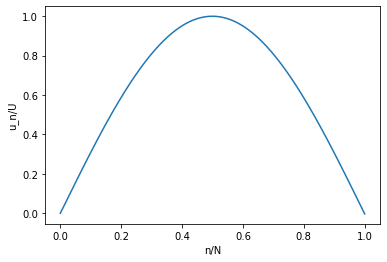

In [5]:
N = 1000  # Positionnement de la masse soumise à la force
w = np.array(pi/N)  # Pulsation de la force

u0 = np.array(0)
u1 = np.array(1)

xaxis = np.linspace(0, 1, 1002)


suite1 = recu()
suite1_norm = suite1/np.max(suite1)

plot([suite1_norm], "n/N", "u_n/U", x=xaxis)

L'amplitude maximale se trouve sur la masse au centre de la chaine. Les conditions limites sont respectées. En effet, les masses aux extremités n'oscillent pas car elles sont fixes.

### 2/



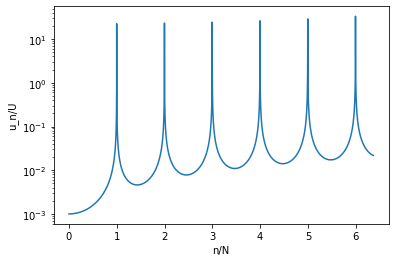

In [6]:
N = 1000
w = np.linspace(0, 20/N, 10000) # 10 000 pulsations de 0 à 20/N

u0= np.zeros(10000)
u1= np.ones(10000)

xaxis = w*N/pi

last_suite = recu()[-1] # valeurs de u_N+1 pour 10 000 pulsations de 0 à 20/N

A = np.abs(1/last_suite)

plot([A], "n/N", "u_n/U", x=xaxis, log=True)

### 3/

[ 0.          1.          1.99960024 ... 45.12447595 45.54682949
 45.95097524]
[ 0.          1.          1.99960016 ... 45.16298389 45.58352426
 45.98583851]
[ 0.          1.          1.99960008 ... 45.2013038  45.62002931
 46.02051046]
[ 0.          1.          1.9996     ... 45.23943557 45.65634455
 46.05499099]


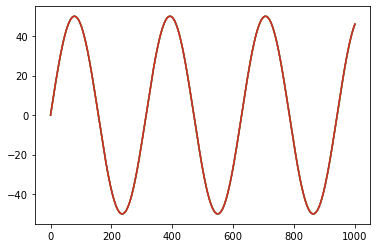

In [7]:
N = 1000
w = np.linspace(0, 20/N, 10000) # 10 000 pulsations de 0 à 20/N
w = w[-4:]

u0= np.zeros(4)
u1= np.ones(4)

puls4_suites = recu().T

for suitee in puls4_suites:
    print(suitee)
    plt.plot(suitee)

Les Courbes se supperposent. Essayons maintenant d'ajuster les données sur un modèle sinusoïdal

La courbe obtenue est une sinusoïde


---

## Partie 2

In [8]:
N = 1000

### 5/

0
1
2
3
4


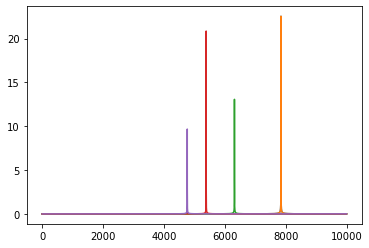

In [9]:
w = np.linspace(0, 4/N, 10000) # 10 000 pulsations de 0 à 4/N

u0= np.zeros(10000)
u1= np.ones(10000)

for r in range(5):
    print(r)
    suites = recu(r)
    last_suite = suites[-1] # valeurs de N+1 pour 10 000 pulsations de 0 à 20/N

    A = np.abs(1/last_suite)
    
    plt.plot(A)

### 6/

In [10]:
w1_list = list()
for r in range(5):
    x = np.linspace(0,1,10000)
    
    last_suite = recu(r+1)[-1]

    A = np.abs(1/last_suite)

    peaks, _ = find_peaks(A)

    w1 = np.array(x[peaks], dtype=float)
    
    w1_list.append(w1)

print(w1_list)

[array([0.78457846]), array([0.63176318]), array([0.53885389]), array([0.47674767]), array([0.43174317])]


### 7/

0.7845784578457846
0.6317631763176318
0.5388538853885388
0.47674767476747676
0.43174317431743175


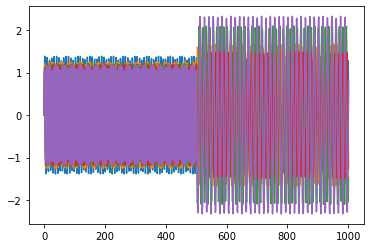

In [11]:
r = 1
for w1 in w1_list:
    w = np.array(float(w1))
    u0 = np.array(0)
    u1 = np.array(1)
    print(w)
    rec = recu(r)
    plt.plot(rec)
    r+=1

### 8/

In [12]:
#### w = np.linspace(0, 4/N, 10000) # 10 000 pulsations de 0 à 4/N


u0= np.zeros(10000)
u1= np.ones(10000)

w1_list = list()
for r in range(99):
    x = np.linspace(0,1,10000)
    
    last_suite = recu(r+1)[-1]

    A = np.abs(1/last_suite)

    peaks, _ = find_peaks(A)

    w1 = np.array(x[peaks], dtype=float)
    
    w1_list.append(w1)


w1_list = [np.array(float(w1[0])) for w1 in w1_list]
x = np.linspace(1,100, 99)

plot([w1_list, 4.06/(N*np.sqrt(x))*100], "", "", x=x, log=True)

/tmp/ipykernel_3798/1003625955.py:7: RuntimeWarning: overflow encountered in multiply
  return np.multiply((2 - r*w**2),u_n_1) - u_n_2
/tmp/ipykernel_3798/1003625955.py:7: RuntimeWarning: invalid value encountered in subtract
  return np.multiply((2 - r*w**2),u_n_1) - u_n_2


IndexError: index 0 is out of bounds for axis 0 with size 0

On voit que le modèle converge pour les r élevés